# An example of using EASYMORE with source netCDF files in regular Latitude and Longitude with missing values for a few grids and time steps
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [1]:
# create the complex NaN case

import xarray as xr
import numpy as np
import os
import glob

path = './data/Source_nc_ERA5/'
nc_names = glob.glob(path+'ERA5_NA_*.nc')

for nc_name in nc_names:
    # cut nc file to a given location
    nc_name_base = os.path.basename(nc_name)
    ds = xr.open_dataset(nc_name)
    ds_subset = ds.sel(latitude=slice(52, 50), longitude=slice(-120, -110))
    # add NaN for 6 hours to all the ds_subset
    lat =   50.75
    lon = -114.00
    # Find the index of the nearest grid cell to the given latitude and longitude
    lat_idx = np.abs(ds_subset['latitude']  - lat).argmin().values
    lon_idx = np.abs(ds_subset['longitude'] - lon).argmin().values
    # Insert NaN values at the corresponding grid cell
    ds_subset['airtemp'][0:5, lat_idx, lon_idx] = np.nan
    lat =   50.75
    lon = -113.75
    # Find the index of the nearest grid cell to the given latitude and longitude
    lat_idx = np.abs(ds_subset['latitude']  - lat).argmin().values
    lon_idx = np.abs(ds_subset['longitude'] - lon).argmin().values
    # Insert NaN values at the corresponding grid cell
    ds_subset['airtemp'][0:5, lat_idx, lon_idx] = np.nan
    # save
    if os.path.isfile(path+nc_name_base+'NaN'):
        os.remove(path+nc_name_base+'NaN')
    ds_subset['airtemp'].encoding['_FillValue'] = None
    ds_subset['pptrate'].encoding['_FillValue'] = None
    ds_subset.to_netcdf(path+nc_name_base+'NaN')
    

In [2]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'ERA5_Medicine_Hat_NaN'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = './temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
esmr.target_shp_ID            = 'COMID' # if not provided easymore give ID according to shape order in shapefile
esmr.target_shp_lat           = 'lat' # if not provided the easymore provides lat from shape centroid
esmr.target_shp_lon           = 'lon' # if not provided the easymore provides lon from shape centroid
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = './data/Source_nc_ERA5/ERA5_NA_*.ncNaN'
# for complex issue with NaN this can be uncommented
# esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.ncNaN'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
esmr.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = './output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
esmr.save_csv                 = True
esmr.complevel                 =  9
# if uncommented EASYMORE will use this and skip GIS tasks
#esmr.remap_csv                = esmr.temp_dir+esmr.case_name +'_remapping.csv'

# execute EASYMORE
esmr.nc_remapper()


EASYMORE version 1.0.0 is initiated.
no author name is provided. The author name is changed to (author name)!
EASYMORE is given multiple variables for remapping but only on format and fill value. EASYMORE repeats the format and fill value for all the variables in output files
EASYMORE will remap variable  airtemp  from source file to variable  temperature  in remapped netCDF file
EASYMORE will remap variable  pptrate  from source file to variable  precipitation  in remapped netCDF file
EASYMORE detects that the variables from the netCDF files are identicalin dimensions of the variables and latitude and longitude
EASYMORE detects that all the variables have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude variables has dimensions of:
['longitude']
EASYMORE detects that the latitude variables has dimensions of:
['latitude']
--CREATING-REMAPPING-FILE--
Started at date and time 2023-04-07 22:49:14.093316
EASYMORE detects that target shapefile is in WGS84

------------
------------
# Visualization of the source and result using easymore functionality

EASYMORE version 1.0.0 is initiated.
EASYMORE detects case 1 - regular lat/lon
max difference of lat values in source nc files are :  0.0
max difference of lon values in source nc files are :  0.0
                     step            timestamp
1979-01-01 03:00:00     3  1979-01-01 03:00:00
3
1979-01-01 03:00:00
the closest time step to what is provided for vizualization  1979-01-01 3:00:00  is  1979-01-01 03:00:00
min: 239.1720733642578, max: 258.30401611328125 for variable: airtemp in source nc file for the time step: 1979-01-01 03:00:00
EASYMORE detects case 1 - regular lat/lon
max difference of lat values in source nc files are :  0.0
max difference of lon values in source nc files are :  0.0
                     step            timestamp
1979-01-01 03:00:00     3  1979-01-01 03:00:00
3
1979-01-01 03:00:00
the closest time step to what is provided for vizualization  1979-01-01 3:00:00  is  1979-01-01 03:00:00
min: 239.1720733642578, max: 258.30401611328125 for variable: airtemp in s

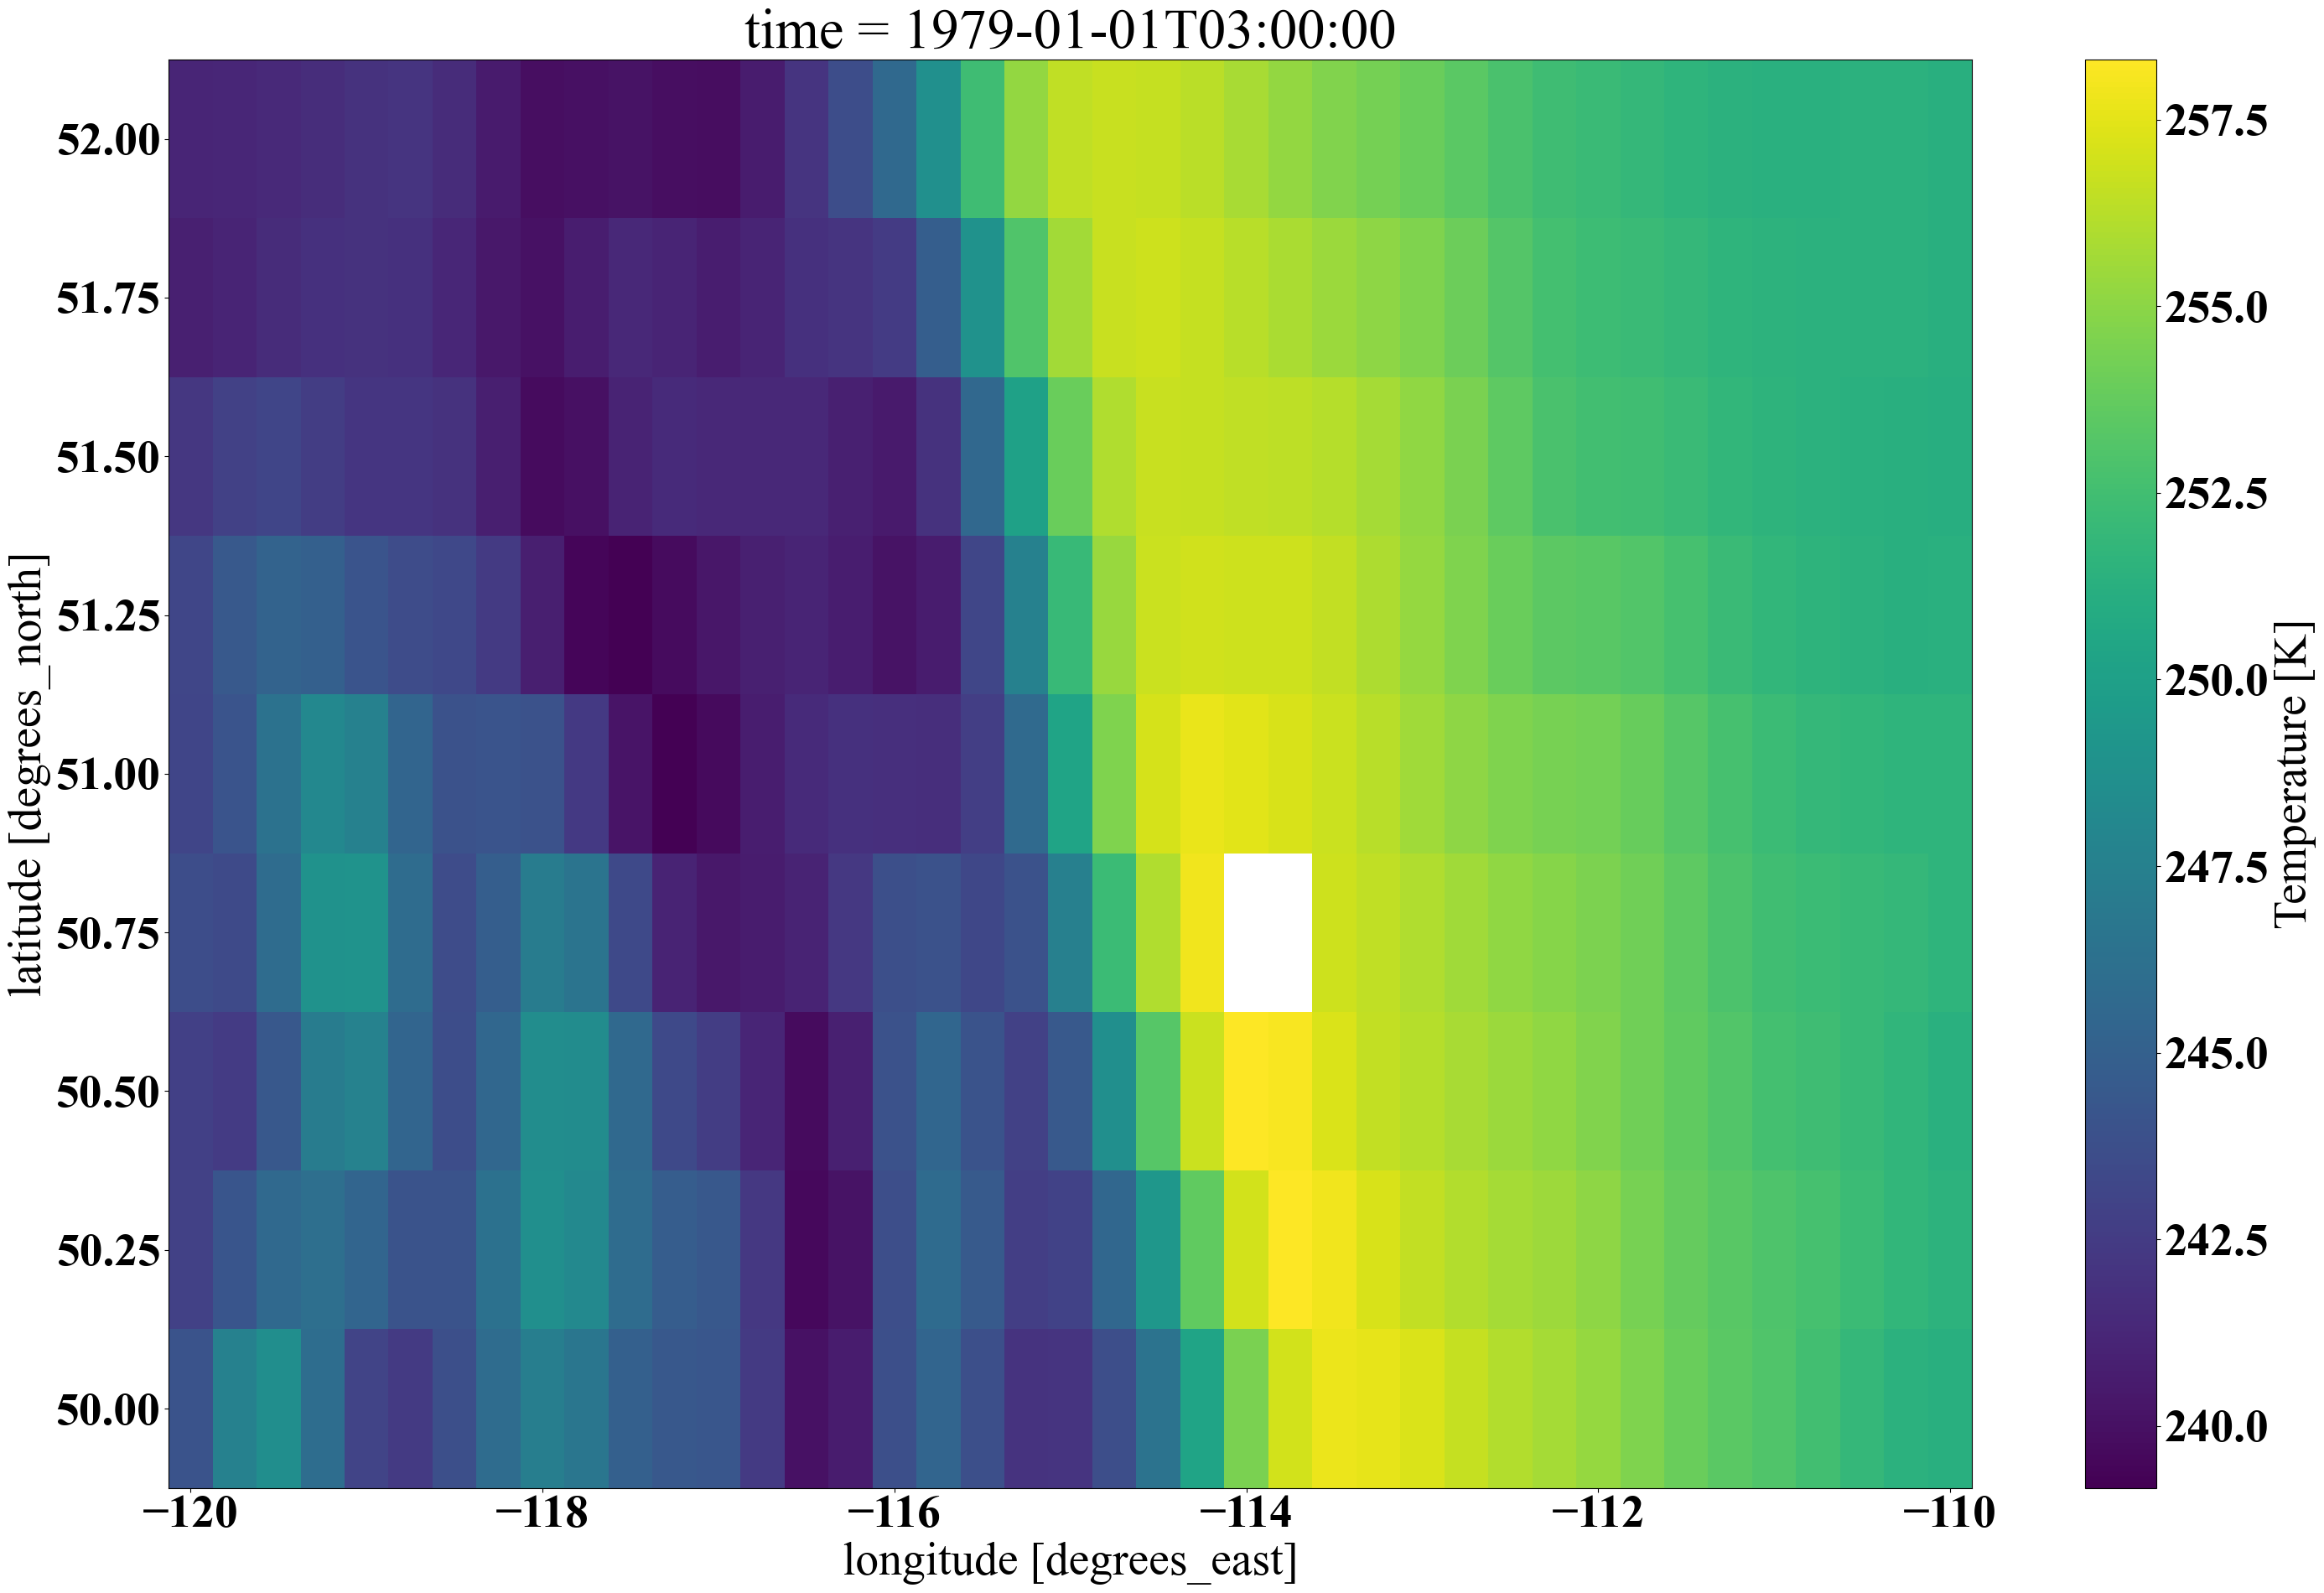

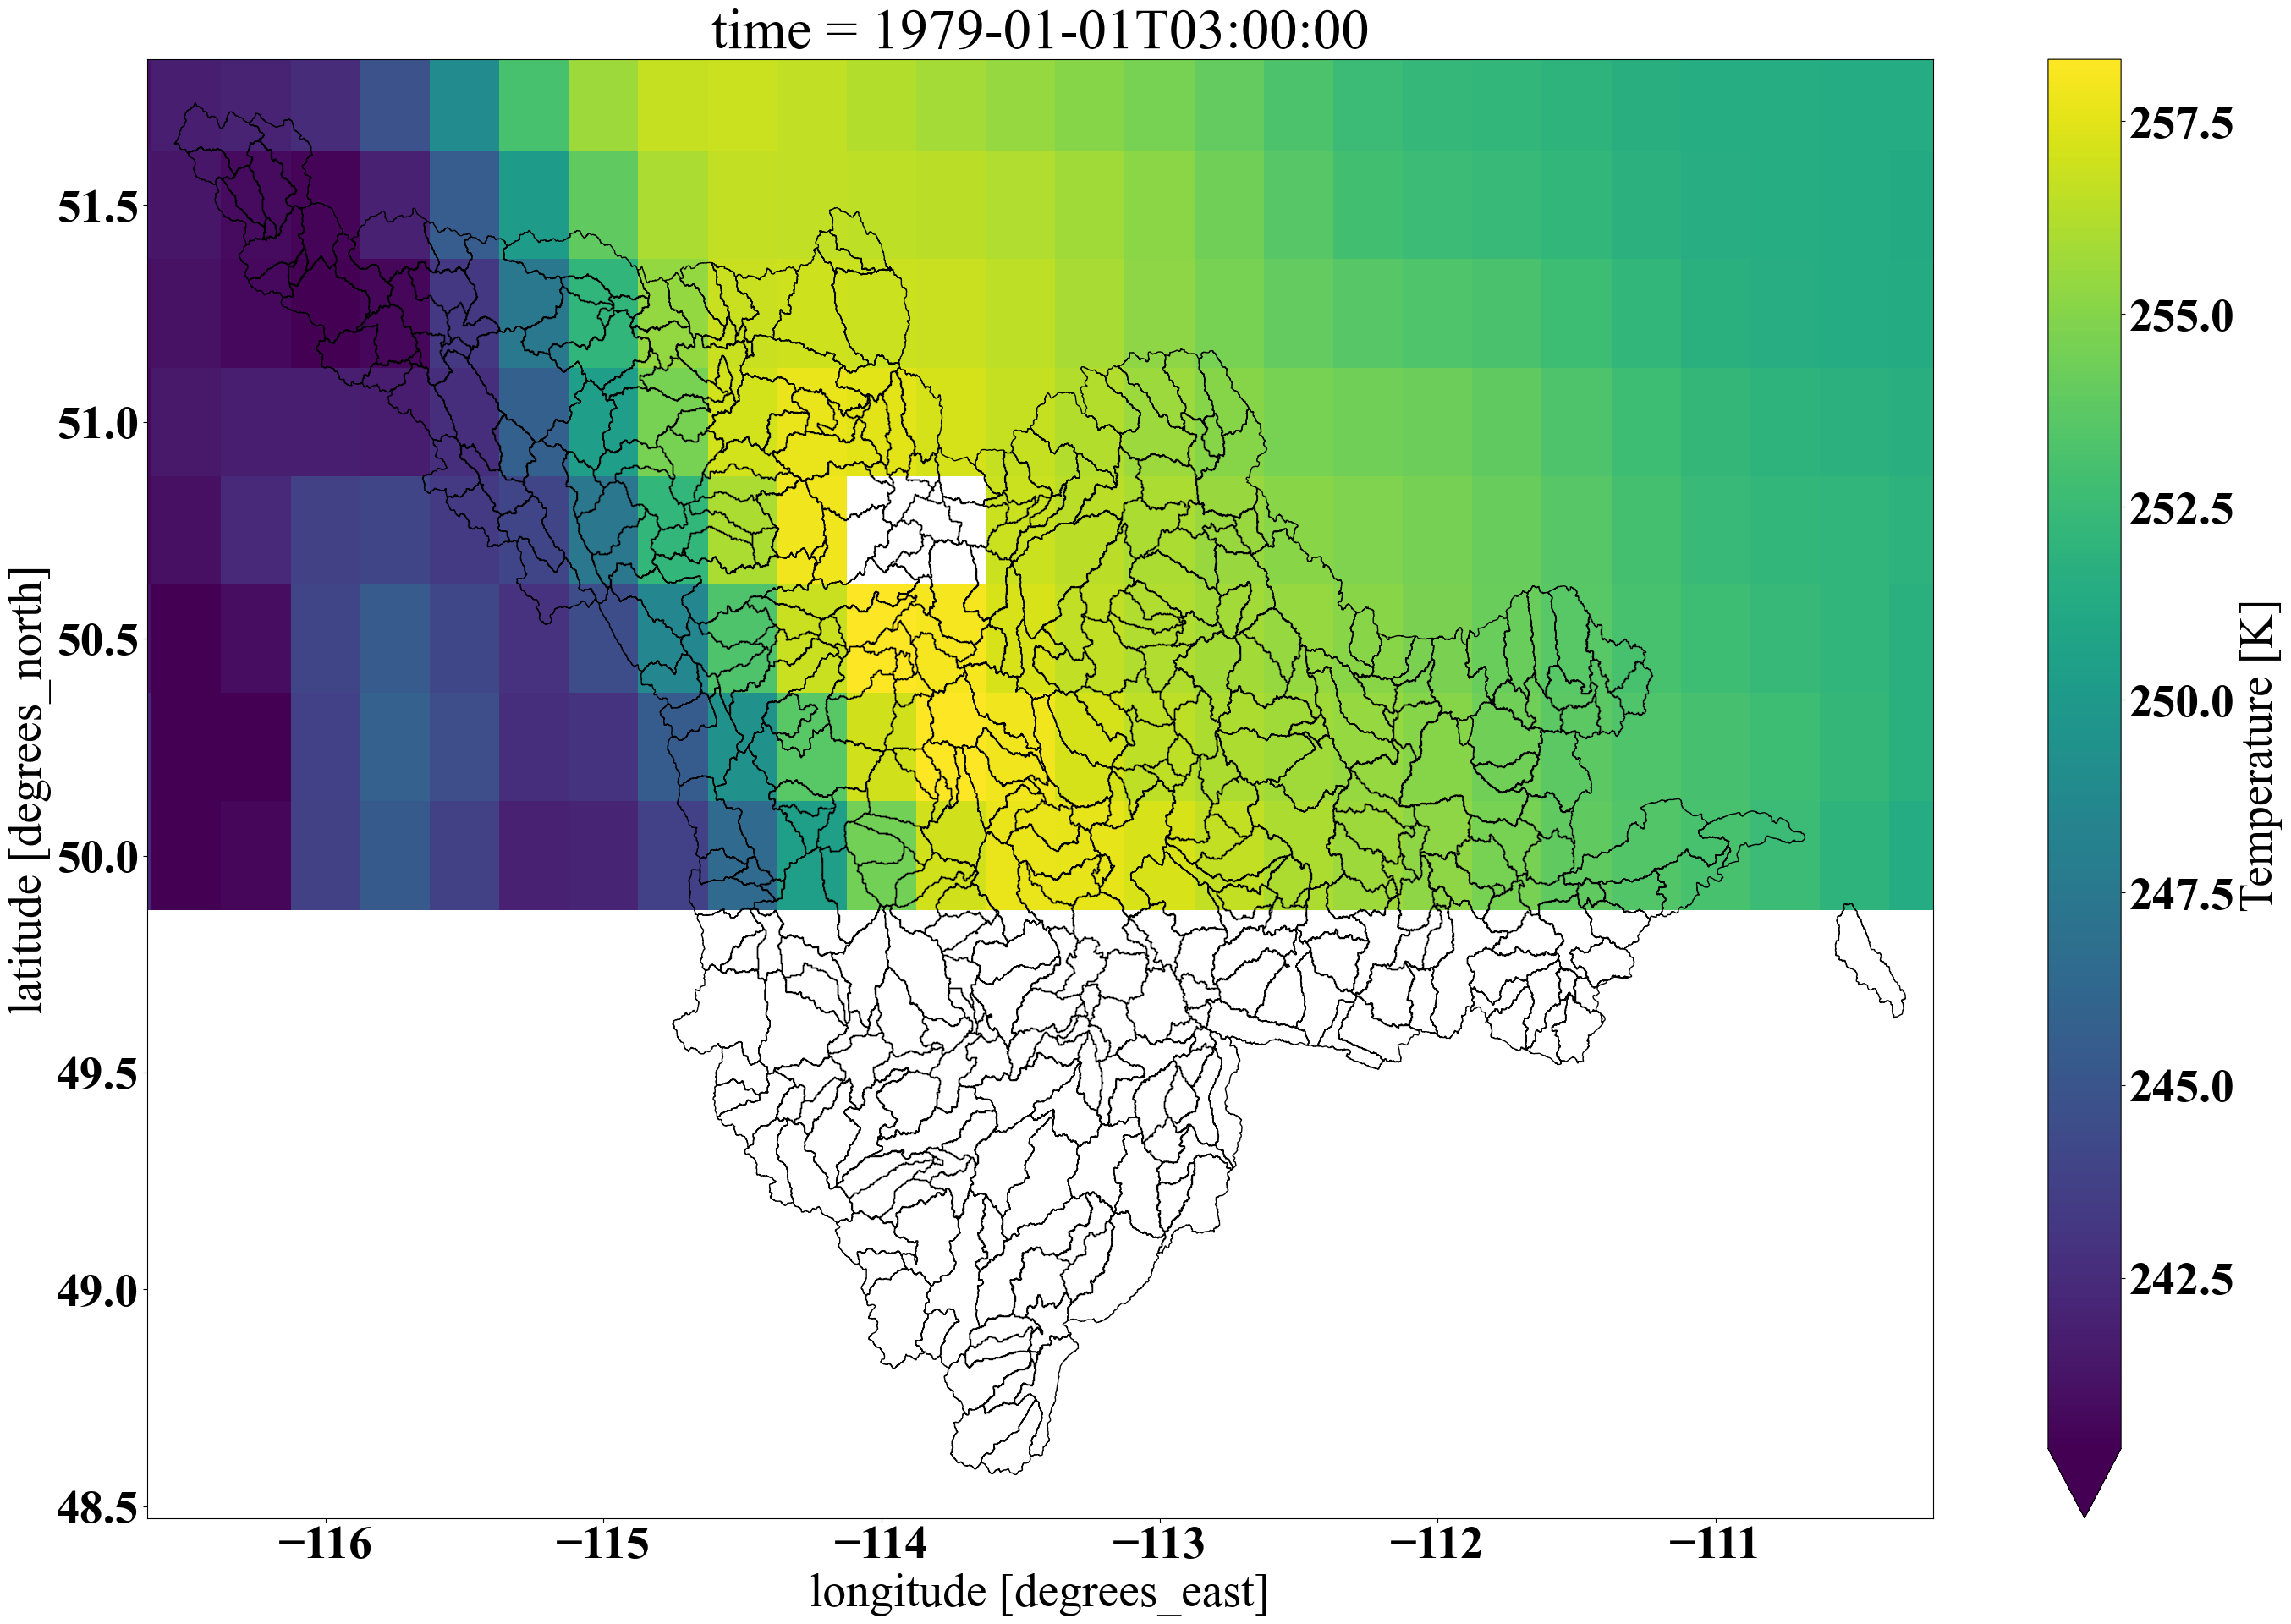

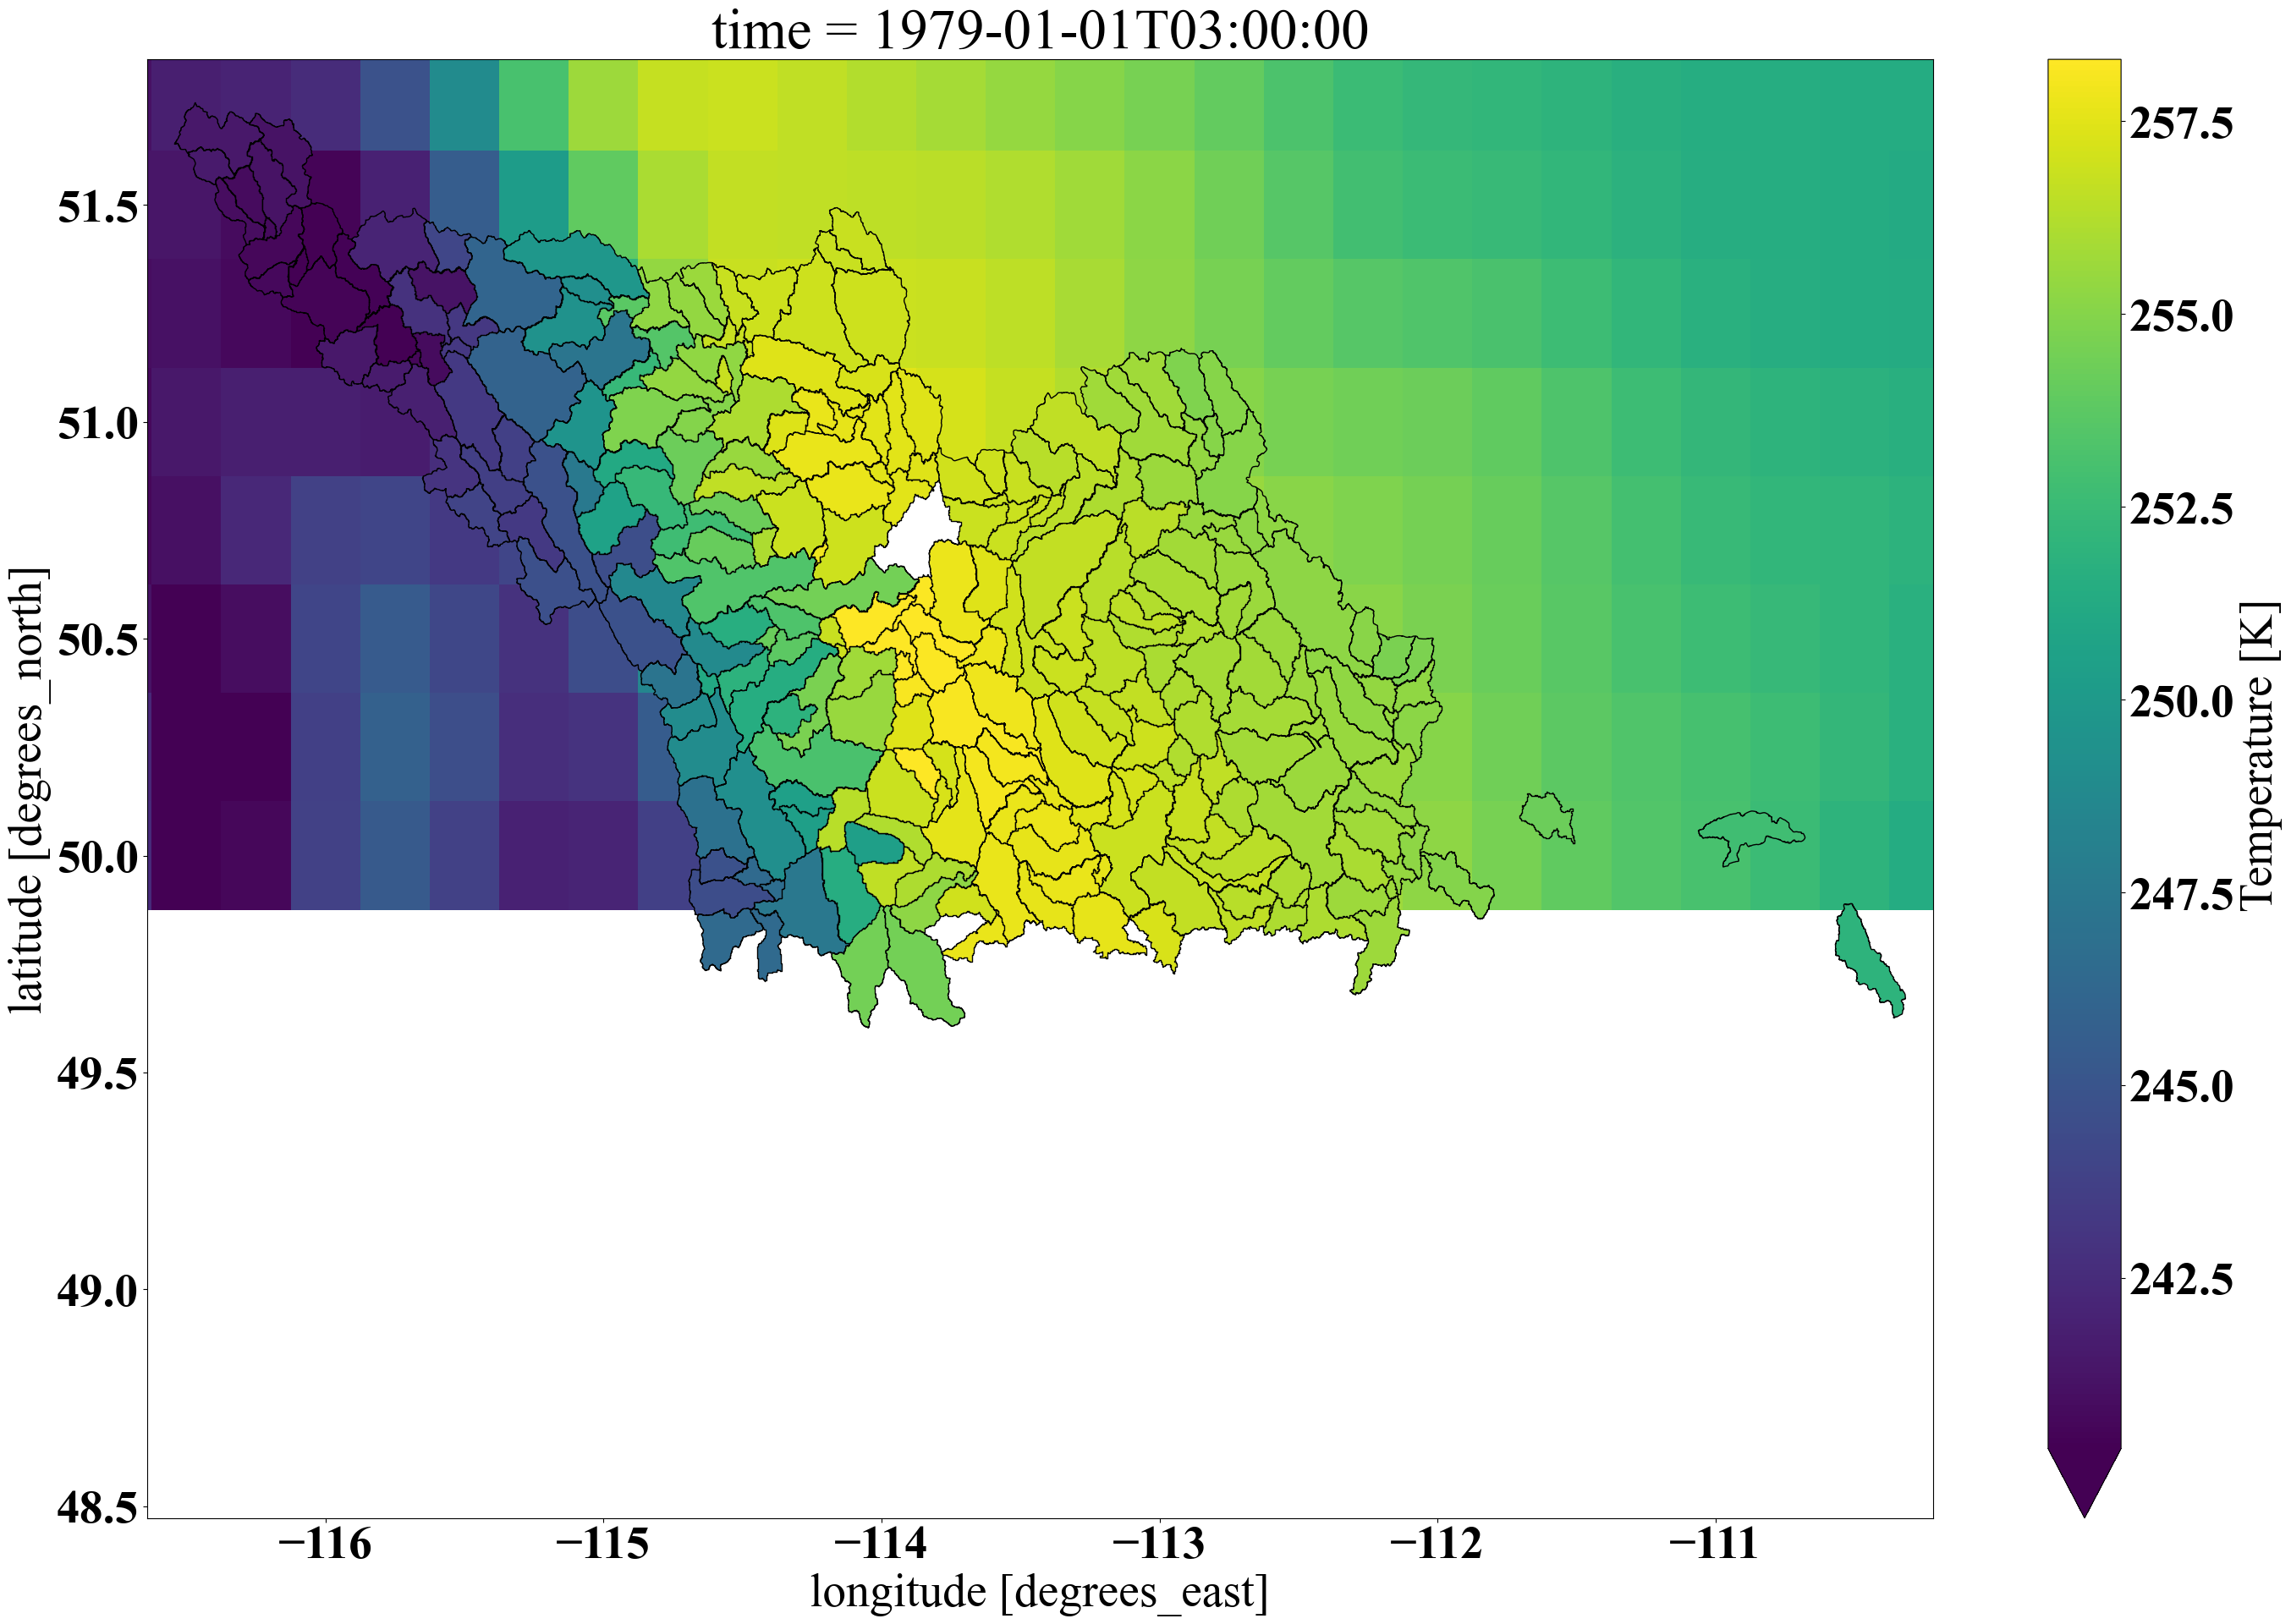

In [1]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# define the source, and target files and parameters
case_name                  = 'ERA5_Medicine_Hat_NaN'  
source_nc_name             = './data/Source_nc_ERA5/ERA5_NA_19790101.ncNaN'
source_nc_var_lon          = 'longitude'
source_nc_var_lat          = 'latitude'
source_nc_var_time         = 'time'
source_nc_var_name         = 'airtemp'
remapped_nc_name           = './output/ERA5_Medicine_Hat_NaN_remapped_1979-01-01-00-00-00.nc'
remapped_nc_var_name       = 'temperature'
remapped_nc_var_ID         = 'ID'
remapped_nc_var_time       = 'time'
time_step_of_viz           = '1979-01-01 3:00:00'
folder_save_fig            = './fig/'
shp_target_name            = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
shp_target_field_ID        = 'COMID'
cmap                       = 'viridis'
linewidth_remapped         = 1
margin                     = 0.1
font_size                  = 40
fig_size                   = (30,20)

# the source nc file
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            fig_name                   = case_name+'_1.png',
            cmap                       = cmap,
            font_size                  = font_size,
            fig_size                   = fig_size)


# the source nc file zoom to target shapefile without showing the remapped variables
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            remapped_nc_name           = remapped_nc_name,
            remapped_nc_var_name       = remapped_nc_var_name,
            remapped_nc_var_ID         = remapped_nc_var_ID,
            remapped_nc_var_time       = remapped_nc_var_time,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            shp_target_name            = shp_target_name,
            linewidth_remapped         = linewidth_remapped,
            show_target_shp_flag       = True,
            fig_name                   = case_name+'_2.png',
            cmap                       = cmap,
            margin                     = margin,
            font_size                  = font_size,
            fig_size                   = fig_size)


# the source nc file zoom to target shapefile with showing the remapped variables
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            remapped_nc_name           = remapped_nc_name,
            remapped_nc_var_name       = remapped_nc_var_name,
            remapped_nc_var_ID         = remapped_nc_var_ID,
            remapped_nc_var_time       = remapped_nc_var_time,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            shp_target_name            = shp_target_name,
            shp_target_field_ID        = shp_target_field_ID,
            linewidth_remapped         = linewidth_remapped,
            show_target_shp_flag       = True,
            show_remapped_values_flag  = True,
            fig_name                   = case_name+'_3.png',
            cmap                       = cmap,
            margin                     = margin,
            font_size                  = font_size,
            fig_size                   = fig_size)



# merge the two figures into one
from PIL import Image, ImageFont, ImageDraw
image_list = [folder_save_fig+case_name+'_2.png' , folder_save_fig+case_name+'_3.png']
image_list_cropped = [folder_save_fig+case_name+'_cropped_2.png' , folder_save_fig+case_name+'_cropped_3.png']


# crop if needed, can be commneted
im = Image.open(image_list[0])
width, height = im.size      
crop_area = (0, 0, width*0.87, height) # (left, upper, right, lower)
cropped_image = im.crop(crop_area)
cropped_image.save(image_list_cropped[0])
#
im = Image.open(image_list[1])
width, height = im.size 
crop_area = (width*0.0622, 0, width, height) # (left, upper, right, lower)
cropped_image = im.crop(crop_area)
cropped_image.save(image_list_cropped[1])

# merging
images = [Image.open(x) for x in image_list_cropped]
widths, heights = zip(*(i.size for i in images))
total_width = sum(widths)
max_height = max(heights)
new_im = Image.new('RGB', (total_width, max_height))
x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]
new_im.save(folder_save_fig+case_name+'.png')
new_im.save(folder_save_fig+'ERA5_NaN.png')
new_im.show()
